Mouvement dans le champ d'une force centrale conservative
=========================================================

**Date:** Jeudi 14 avril 2022



## Capacité numérique



-   Équations différentielles d’ordre supérieur ou égal à 2
    -   Transformer une équation différentielle d’ordre n en un système
        différentiel de n équations d’ordre 1
    -   Utiliser la fonction odeint de la bibliothèque scipy.integrate (sa
        spécification étant fournie).
    -   à l’aide d’un langage de programmation, obtenir des trajectoires
        d’un point matériel soumis à un champ de force centrale
        conservatif.



## Modules



Conformément au programme, on utilise la fonction `odeint` du module
`scipy.integrate` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)) pour réaliser l'intégration
**numérique** d'une équation différentielle d'ordre 2.

Notons qu'on pourra lui préférer la fonction `solve_ivp` du même
module offrant davantage de possibilités ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)), en
particulier celle de déterminer les instants où certains évènements
sont réalisés.

La ligne précédente ne doit apparaître que dans les notebooks
`Jupyter`, pas dans un fichier python.



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy.ma as ma

## Équation différentielle d'ordre 2



In [2]:
%matplotlib notebook

### Système d'équation différentielles d'ordre 1 adimensionnement



Pour une force newtonienne, les équations différentielles
adimensionnées en coordonnées polaires s'écrivent:

\begin{align*}
\rho^\prime  &= \frac{\mathrm{d} \rho}{\mathrm{d} \tau}\quad&
\theta^\prime  &= \frac{\mathrm{d} \theta}{\mathrm{d} \tau}\\
\frac{\mathrm{d}^2 \rho^\prime}{\mathrm{d} \tau^2} &= - \frac{4
\pi^2}{\rho} + \rho {\left(\frac{\mathrm{d} \theta}{\mathrm{d}
\tau}\right)}^2
&
\frac{\mathrm{d}^2 \theta}{\mathrm{d} \tau^2} &= - 2 \frac{\mathrm{d}
\rho}{\mathrm{d} \tau} \frac{\mathrm{d}
\theta}{\mathrm{d} \tau}
\end{align*}

Remarquons qu'on aurait aussi pu travailler en coordonnées
cartésiennes en écrivant la force sous la forme:

\begin{equation*}
 -\frac{\mathcal{G} m_T m}{{\left(x^2 + y^2\right)}^{3/2}} \left(x \vec{e_x}_ + y \vec{e_y}\right) 
\end{equation*}

car $\vec{e_r} = (x \vec{e_x} + y \vec{e_y} )/\sqrt{x^2 + y^2}/$ et $r^2 =
x^2 + y^2$



### Question 4b: sans frottement



On cherche à intégrer numériquement le système différentiel:

-   entre les instants $t_{\min}$ et $t_{\max}$
-   vérifiant les conditions initiales



<IPython.core.display.Javascript object>


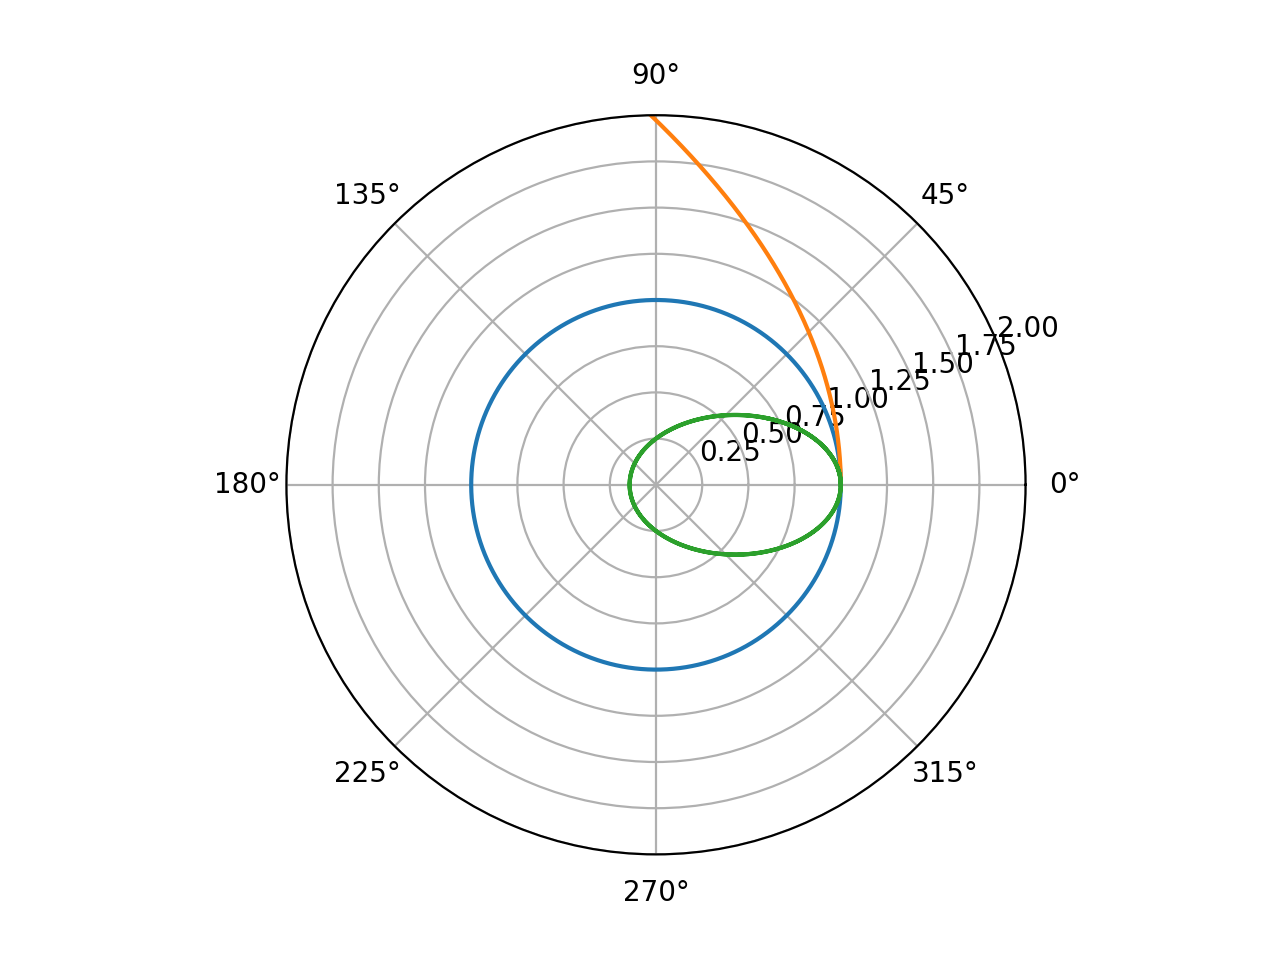

In [3]:
def systdiff4b(X,tau):
    r,rprime,theta,thetaprime = X
    return [rprime,-4*np.pi**2/r**2 + r*(thetaprime)**2 ,thetaprime,-2*rprime*thetaprime/r]
Rayon = 6800 #km
Periode = 8458 #s
masse = 140e3 #kg
gamma = 5.0e-5 # kg/m

tau_min = 0
tau_max = 1 #Periode
NombrePoints = 2000
tau = np.linspace(tau_min,tau_max,NombrePoints)

rho0 = 1 #en unités de Rs
omega0 = 2*np.pi
CIs = [[rho0,0,0,omega0],[rho0,0,0,np.sqrt(2)**omega0],[rho0,0,0,omega0/2]]
NombreCI = len(CIs)

sols = [odeint(systdiff4b,CIs[i],tau) for i in range(NombreCI)]

rhos = np.array([sols[i][:,0] for i in range(NombreCI)])
thetas = np.array([sols[i][:,2] for i in range(NombreCI)])
omegas = np.array([sols[i][:,3] for i in range(NombreCI)])
figtrajectoire, axtrajectoire = plt.subplots(subplot_kw={"projection": "polar"})
[axtrajectoire.plot(thetas[i],rhos[i]) for i in range(NombreCI)]
axtrajectoire.set_ylim(0,2)
figtrajectoire.show()

<IPython.core.display.Javascript object>


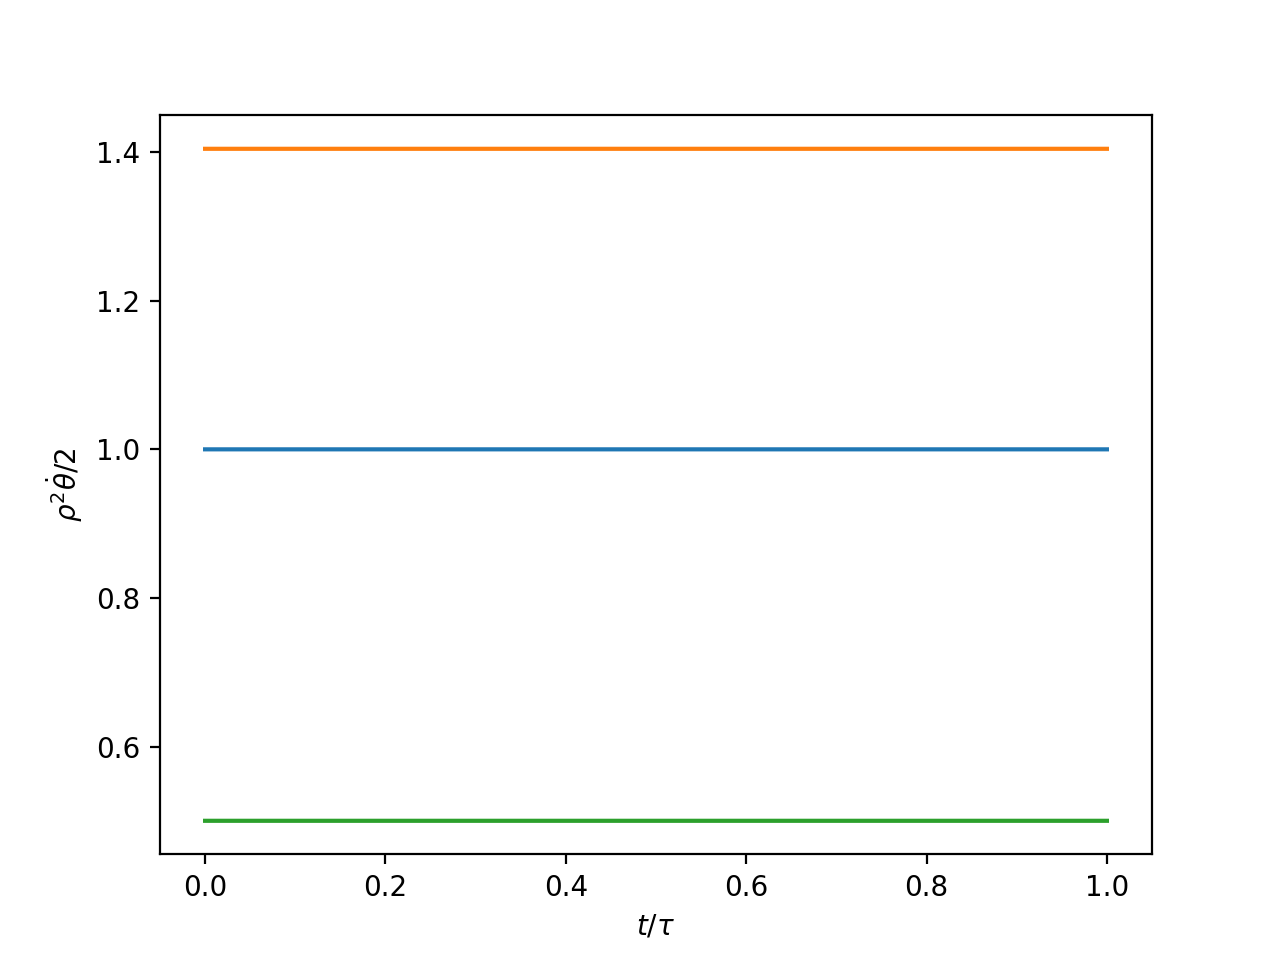

In [4]:
aires = rhos**2*omegas/(2*np.pi)
figaires,axaires = plt.subplots()
[axaires.plot(tau,aires[i]) for i in range(NombreCI)]
axaires.set_xlabel(r'$t/\tau$')
axaires.set_ylabel(r'$\rho^2\dot{\theta}/2$')
figaires.show()

### Question 4c: avec frottement



<IPython.core.display.Javascript object>


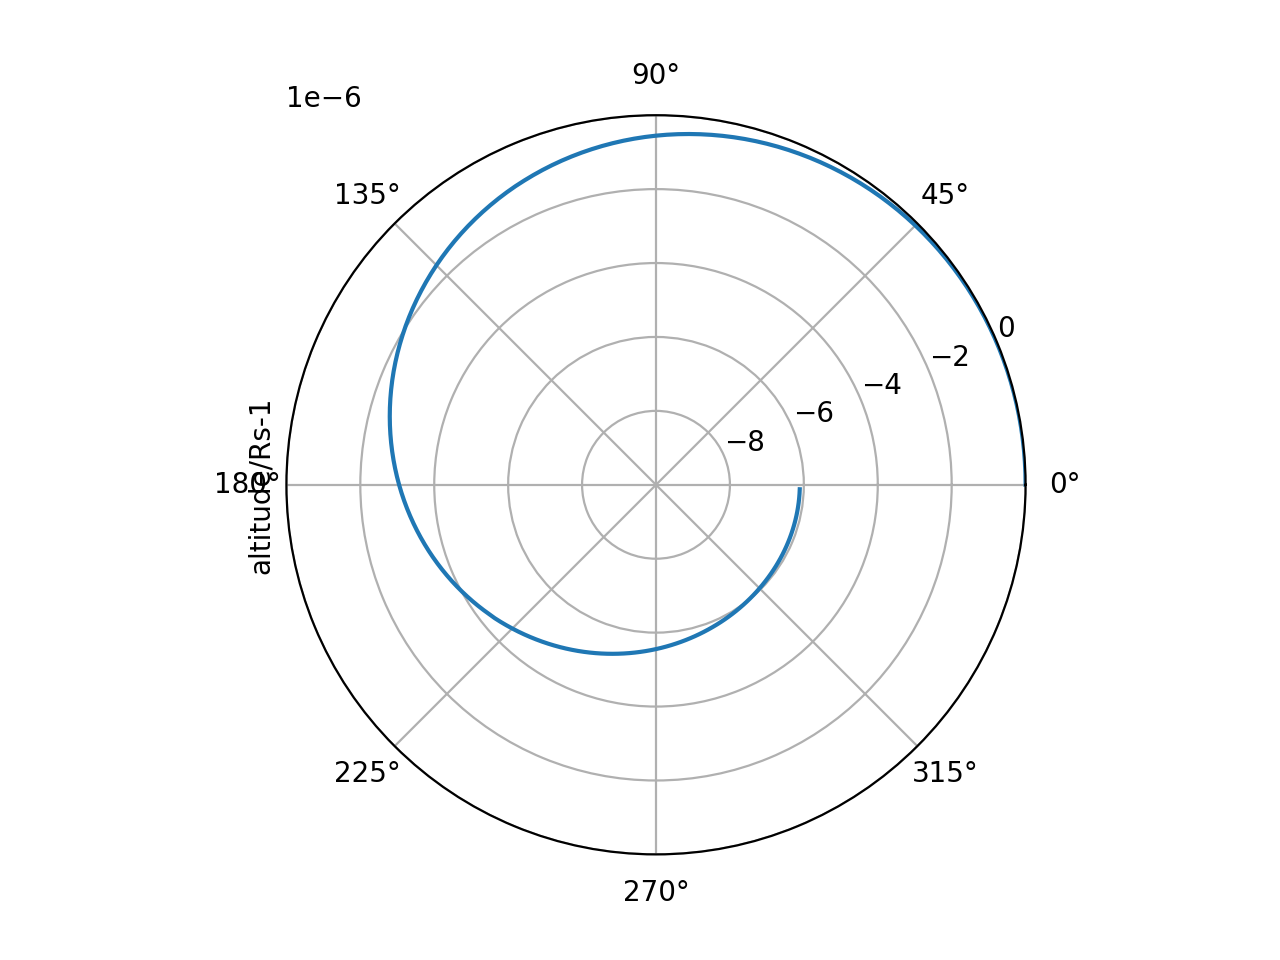

In [5]:
def systdiff4c(u,tau,beta):
    r,rprime,theta,thetaprime = u
    v = np.sqrt(rprime**2 + (r*thetaprime)**2) #norme adimensionnée de la vitesse
    # d theta/d t = thetaprime
    # d thetaprime / dt = - sin(theta)
    return [rprime,-4*np.pi**2/r**2 + r*(thetaprime)**2 - beta*v*rprime,thetaprime,-2*rprime/r*thetaprime-beta*v*r*thetaprime]

Rayon = 6800 #km
Periode = 8458 #s
masse = 140e3 #kg
gamma = 1.0e-8 # kg/m
beta = gamma*Rayon*1e3/masse

tau4c_min = 0
tau4c_max = 100 #Periode
NombrePoints4c = 20000
tau4c = np.linspace(tau4c_min,tau4c_max,NombrePoints4c)

CI4c = [rho0,0,0,omega0]

sol4c = odeint(systdiff4c,CI4c,tau4c, args = (beta,))
rho4c,theta4c = np.array(sol4c[:,0]),np.array(sol4c[:,2])

mask4c=ma.masked_greater(tau4c,1).mask #pour ne conserver que l'intervalle tau = 0:1, soit t = 0:T0

tau4cMasked = tau4c[~mask4c]
rho4cMasked = rho4c[~mask4c]
theta4cMasked = theta4c[~mask4c]

figtrajectoire4c,axtrajectoire4c = plt.subplots(subplot_kw={"projection": "polar"})
axtrajectoire4c.plot(theta4cMasked,rho4cMasked-1)
axtrajectoire4c.set_ylim(-1e-5,0)
axtrajectoire4c.set_ylabel('altitude/Rs-1')
figtrajectoire4c.show()

<IPython.core.display.Javascript object>


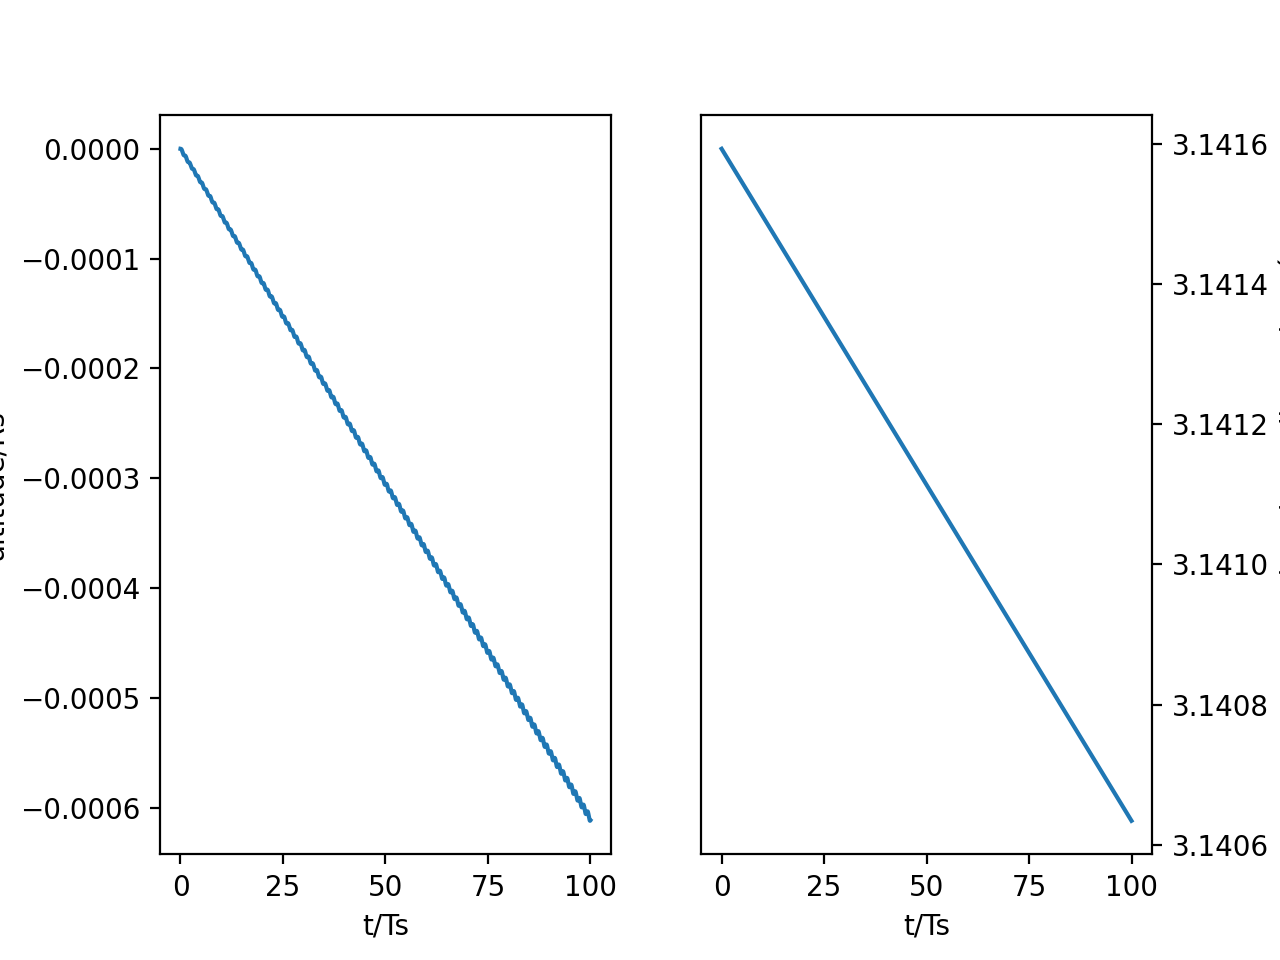

In [6]:
figaltitude4c,(axaltitude4c,axaires4c) = plt.subplots(1,2)
axaltitude4c.plot(tau4c,rho4c-1)
axaltitude4c.set_ylabel('altitude/Rs')
axaltitude4c.set_xlabel('t/Ts')

omega4c = np.array(sol4c[:,3])
aires4c = .5* rho4c**2 * omega4c
axaires4c.plot(tau4c,aires4c)
axaires4c.set_ylabel('constante des aires adimensionnée')
axaires4c.yaxis.set_label_position("right")
axaires4c.yaxis.set_ticks_position("right")
axaires4c.set_xlabel('t/Ts')
figaltitude4c.show()

### Question 4d



<IPython.core.display.Javascript object>


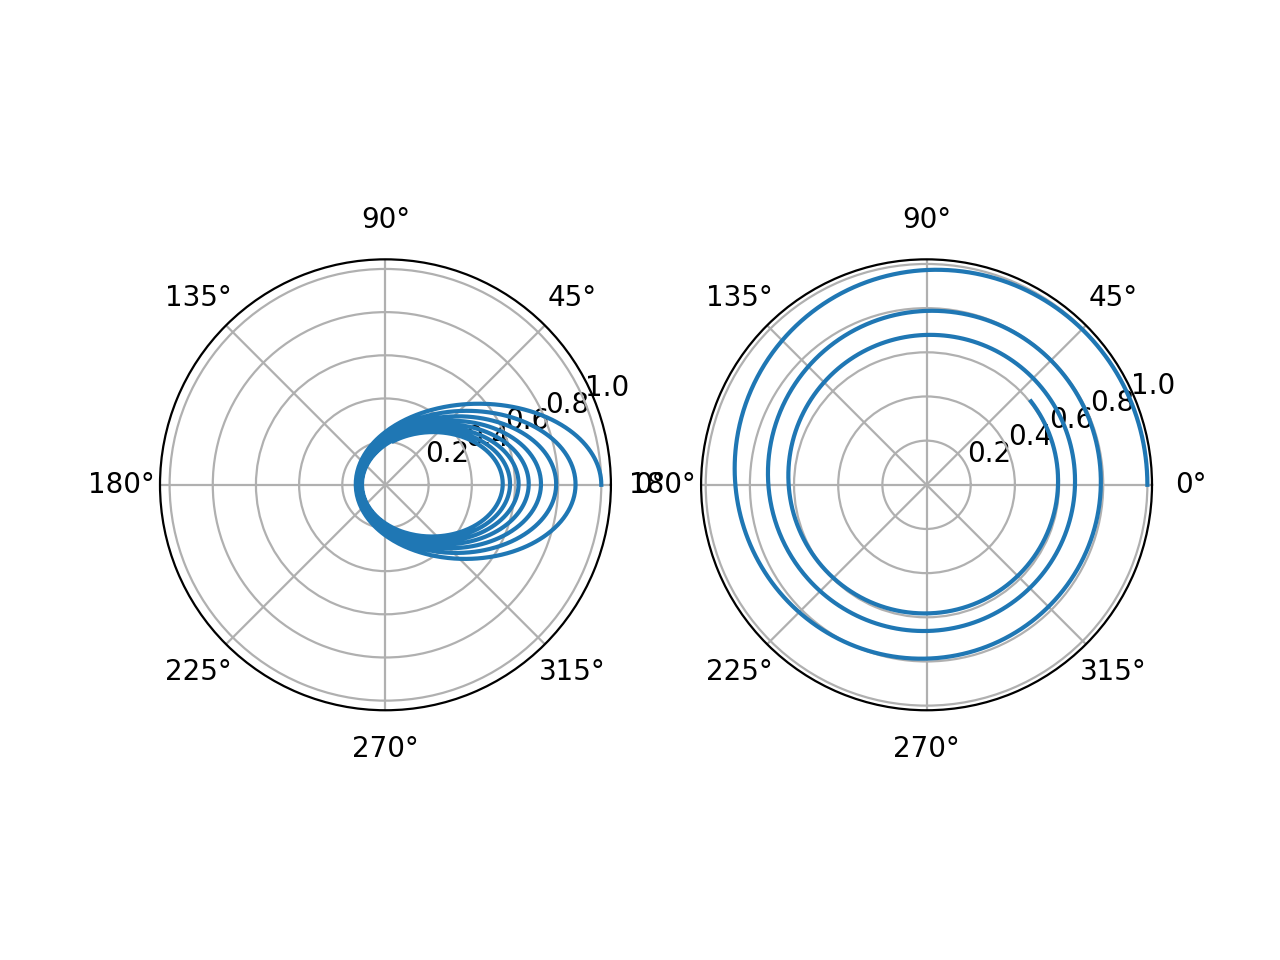

In [7]:
gamma4d = 1.0e-8*5e4 # kg/m
beta4d = (Rayon*1e3/masse)*np.array([gamma4d, gamma4d])

tau4d_min = 0
tau4d_max = 2

#Periode
NombrePoints4d = 2000

tau4d = np.linspace(tau4d_min,tau4d_max,NombrePoints4d)

CI4d = [[rho0,0,0,omega0/2],[rho0,0,0,omega0]]

sols4d = [odeint(systdiff4c,CI4d[i],tau4d, args = (beta4d[i],)) for i in range(2)]

fig4d,(ax4dI,ax4dII) = plt.subplots(1,2,subplot_kw={"projection": "polar"})
rhos4d = np.array([sols4d[i][:,0] for i in range(2)])
omegas4d = np.array([sols4d[i][:,2] for i in range(2)])
ax4dI.plot(omegas4d[0],rhos4d[0])
ax4dII.plot(omegas4d[1],rhos4d[1])
fig4d.show()